In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import ast
from collections import Counter
import re
import mysql.connector

In [2]:
remote = mysql.connector.connect(
    host = "database-1.cvkugmey24at.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "root",
    password = "bnmqaz010203",
    database = "eda_project"
)
cur = remote.cursor(buffered=True)

In [3]:
cur.execute("SELECT * FROM movie")
result = cur.fetchall()
columns = [desc[0] for desc in cur.description]
raw_data = pd.DataFrame(result, columns=columns)
raw_data.head()

,id,name,year,month,sale,audience,screen,screen_number,genre
0,0,명량,2014,7,2147483647,17613682,1587,188611,사극
1,1,겨울왕국,2014,1,2147483647,10296101,1010,157683,애니메이션
2,2,인터스텔라,2014,11,2147483647,10105247,1410,166218,SF
3,3,해적: 바다로 간 산적,2014,8,2147483647,8666046,910,133350,어드벤처
4,4,수상한 그녀,2014,1,2147483647,8657982,1027,136975,드라마


In [4]:
years = raw_data["year"].unique().tolist()
years

[2014, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [14]:
sales = []
audiences = []
screens = []

for year in years:
    sale = 0
    audience = 0
    screen = 0
    
    # Filter the DataFrame for the current year
    filtered_data = raw_data[raw_data["year"] == year]
    
    # Iterate over each row in the filtered DataFrame
    for _, row in filtered_data.iterrows():
        sale += row["sale"]
        audience += row["audience"]
        screen += row["screen_number"]

    sales.append(sale)
    audiences.append(audience)
    screens.append(screen)

sales[1] = sales[0] + sales[1]
sales  = sales[1:]
sales

[111669149644,
 107374182350,
 105226698703,
 111418917567,
 105226698703,
 120503483408,
 85567632598,
 109696782762,
 109521665997,
 100931731409]

In [15]:
audiences[1] = audiences[0] + audiences[1]
audiences = audiences[1:]
audiences

[183142452,
 173107166,
 169106073,
 178613086,
 163809672,
 191703715,
 44128673,
 54536759,
 104377458,
 100759828]

In [16]:
screens[1] = screens[0] + screens[1]
screens = screens[1:]
screens

[3607594,
 3762545,
 3674658,
 4182486,
 4282667,
 5063297,
 2895248,
 3692827,
 4648826,
 4216898]

In [17]:
years[1] = 2014
years = years[1:]
years

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [19]:
data = {"Year":years, "Audience":audiences, "Sale":sales, "Screen":screens}
df = pd.DataFrame(data)
df

,Year,Audience,Sale,Screen
0,2014,183142452,111669149644,3607594
1,2015,173107166,107374182350,3762545
2,2016,169106073,105226698703,3674658
3,2017,178613086,111418917567,4182486
4,2018,163809672,105226698703,4282667
5,2019,191703715,120503483408,5063297
6,2020,44128673,85567632598,2895248
7,2021,54536759,109696782762,3692827
8,2022,104377458,109521665997,4648826
9,2023,100759828,100931731409,4216898


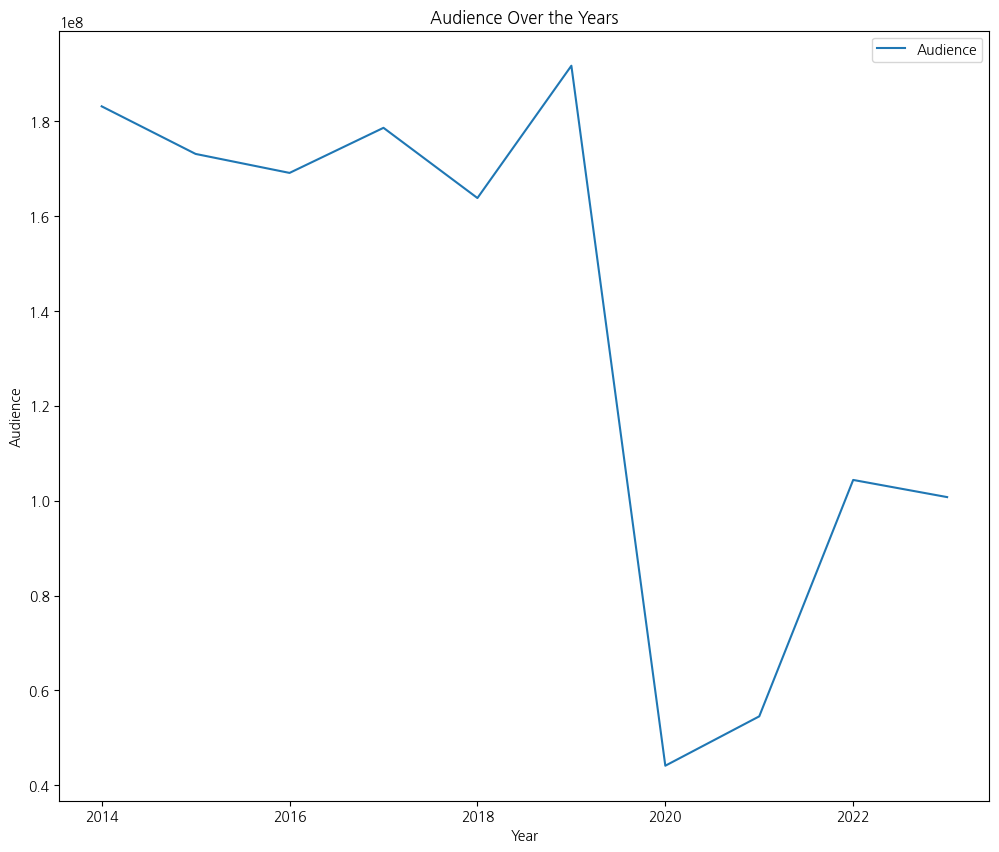

In [25]:
df.plot(x="Year", y="Audience", figsize=(12, 10))
plt.xlabel("Year")  # Set the x-axis label
plt.ylabel("Audience")  # Set the y-axis label
plt.title("Audience Over the Years")  # Add a title
plt.savefig('Audience_Change.png')
plt.show()

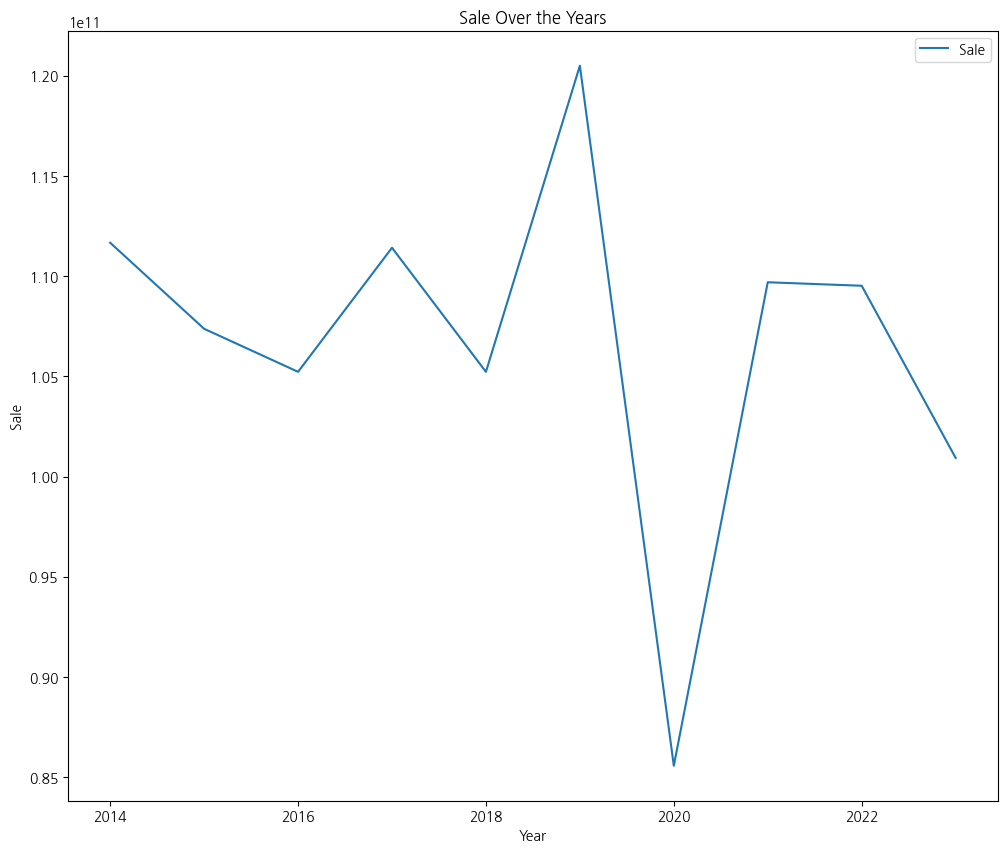

In [26]:
df.plot(x="Year", y="Sale", figsize=(12, 10))
plt.xlabel("Year")  # Set the x-axis label
plt.ylabel("Sale")  # Set the y-axis label
plt.title("Sale Over the Years")  # Add a title
plt.savefig('Sale_Change.png')
plt.show()

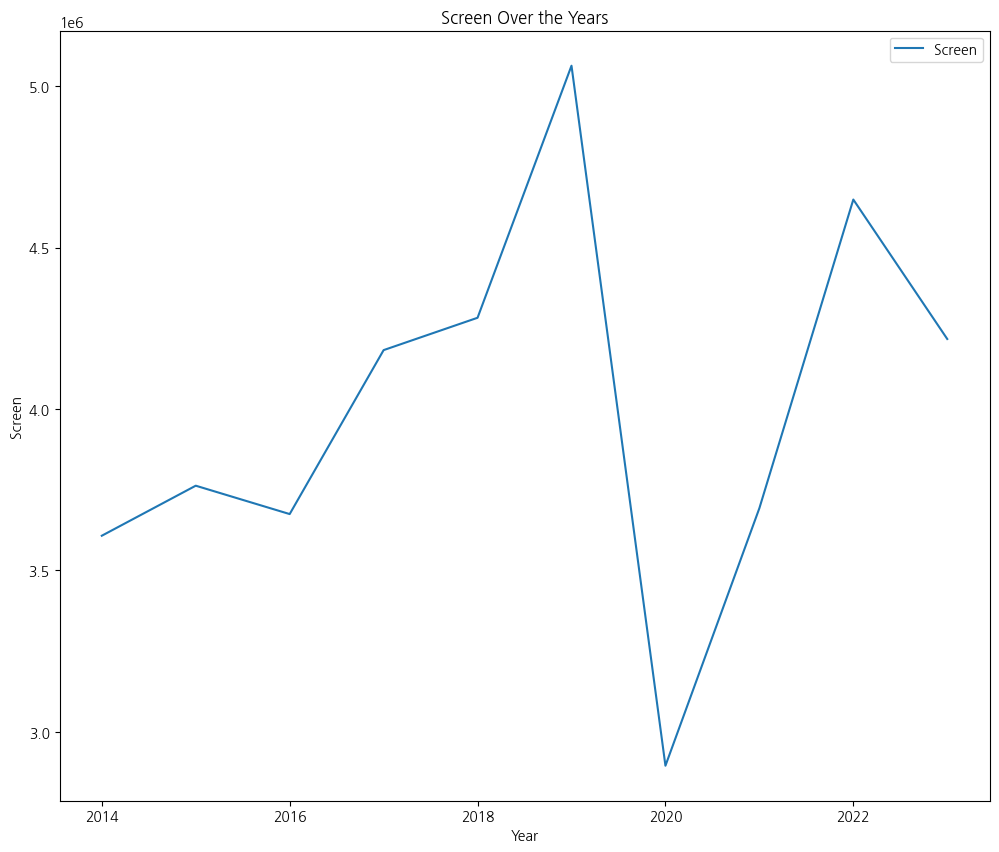

In [27]:
df.plot(x="Year", y="Screen", figsize=(12, 10))
plt.xlabel("Year")  # Set the x-axis label
plt.ylabel("Screen")  # Set the y-axis label
plt.title("Screen Over the Years")  # Add a title
plt.savefig('Screen_Change.png')
plt.show()